In [16]:
import GPflow
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

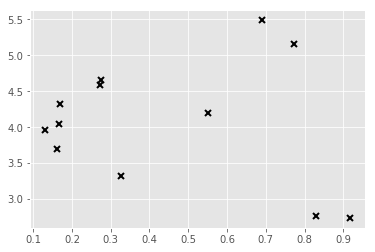

In [25]:
N = 12
X = np.random.rand(N,1)
Y = np.sin(12*X) + 0.66*np.cos(25*X) + np.random.randn(N,1)*0.1 + 3+np.random.rand(N,1)+np.random.rand(N,1)
plt.plot(X, Y, 'kx', mew=2)

In [33]:
k = GPflow.kernels.Linear(1)#GPflow.kernels.Matern52(1, lengthscales=0.3)
m = GPflow.gpr.GPR(X, Y, kern=k)
m.likelihood.variance = 0.01

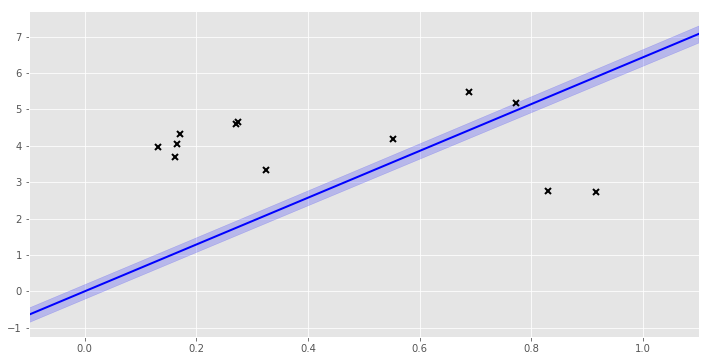

In [34]:

def plot(m):
    xx = np.linspace(-0.1, 1.1, 100)[:,None]
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(X, Y, 'kx', mew=2)
    plt.plot(xx,
            mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.xlim(-0.1, 1.1)
plot(m)

In [28]:
m


Name,values,prior,constraint
name.likelihood.variance,[ 0.01],None,+ve
name.kern.variance,[ 1.],None,+ve
name.kern.lengthscales,[ 0.3],None,+ve


In [29]:
    xx = np.linspace(-0.1, 1.1, 100)[:,None]
    mean, var = m.predict_y(xx)



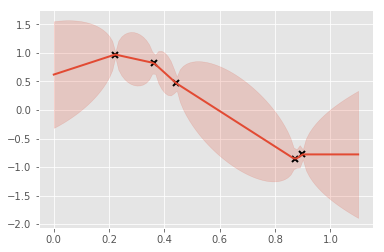

In [37]:
import tensorflow as tf

class Brownian(GPflow.kernels.Kern):
    def __init__(self):
        GPflow.kernels.Kern.__init__(self, input_dim=1, active_dims=[0])
        self.variance = GPflow.param.Param(1.0, transform=GPflow.transforms.positive)
        
    def K(self, X, X2=None):
        if X2 is None:
            X2 = X
        return self.variance * tf.minimum(X, tf.transpose(X2))
    
    def Kdiag(self, X):
        return self.variance * tf.reshape(X, (-1,))
    
X = np.random.rand(5, 1)
Y = np.sin(X*6) + np.random.randn(*X.shape)*0.001


k1 = Brownian()
k2 = GPflow.kernels.Constant(1)
k = k1 + k2

m = GPflow.gpr.GPR(X, Y, kern=k)
m.optimize()

xx = np.linspace(0, 1.1, 100).reshape(100, 1)
mean, var = m.predict_y(xx)
plt.plot(X, Y, 'kx', mew=2)
line, = plt.plot(xx, mean, lw=2)
_ = plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color=line.get_color(), alpha=0.2)

In [38]:
import GPflow
import tensorflow as tf
import os
import numpy as np

def getData():
    rng = np.random.RandomState( 1 )
    N = 30
    X = rng.rand(N,1)
    Y = np.sin(12*X) + 0.66*np.cos(25*X) + rng.randn(N,1)*0.1 + 3
    return X,Y
    
def getRegressionModel(X,Y):
    #build the GPR object
    k = GPflow.kernels.Matern52(1)
    meanf = GPflow.mean_functions.Linear(1,0)
    m = GPflow.gpr.GPR(X, Y, k, meanf)
    m.likelihood.variance = 0.01
    print "Here are the parameters before optimization"
    m
    return m

def optimizeModel(m):
    m.optimize()
    print "Here are the parameters after optimization"
    m

def setModelPriors( m ):
    #we'll choose rather arbitrary priors. 
    m.kern.lengthscales.prior = GPflow.priors.Gamma(1., 1.)
    m.kern.variance.prior = GPflow.priors.Gamma(1., 1.)
    m.likelihood.variance.prior = GPflow.priors.Gamma(1., 1.)
    m.mean_function.A.prior = GPflow.priors.Gaussian(0., 10.)
    m.mean_function.b.prior = GPflow.priors.Gaussian(0., 10.)
    print "model with priors ", m

def getSamples( m ):
    samples = m.sample(100, epsilon = 0.1)
    return samples

def runExperiments(sampling=True,outputGraphs=False):
    X,Y = getData()
    m = getRegressionModel(X,Y)
    optimizeModel(m)
    if sampling:
        setModelPriors( m )
        samples = getSamples( m )

if __name__ == '__main__':
    runExperiments()
    #cProfile.run( 'runExperiments( plotting=False )' )

Here are the parameters before optimization
Here are the parameters after optimization
model with priors  name.kern.lengthscales transform:+ve prior:Ga([ 1.],[ 1.])
[ 0.08786933]
name.kern.variance transform:+ve prior:Ga([ 1.],[ 1.])
[ 0.70960348]
name.mean_function.A transform:(none) prior:N([ 0.],[ 10.])
[[-0.75312107]]
name.mean_function.b transform:(none) prior:N([ 0.],[ 10.])
[ 3.39353417]
name.likelihood.variance transform:+ve prior:Ga([ 1.],[ 1.])
[ 0.0057672]
